In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 6.3 The Multivariate Normal - Marginalization

## Objectives

+ To demonstrate marginalization with a multivariate normal.

## The multivariate mormal - Marginalization

Consider the $N$-dimensional multivariate normal:
$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$
where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.
In the lecture, we said that if you consider the marginal PDF of a component of $\mathbf{X}$, say $X_1$, then it will follow a Gaussian with mean $\mu_1$ and variance $\Sigma_{11}$.
Let's demonstrate this by sampling in the random vector $\mathbf{X}$ and just looking at the histogram of its $X_1$ component.
Here is how:

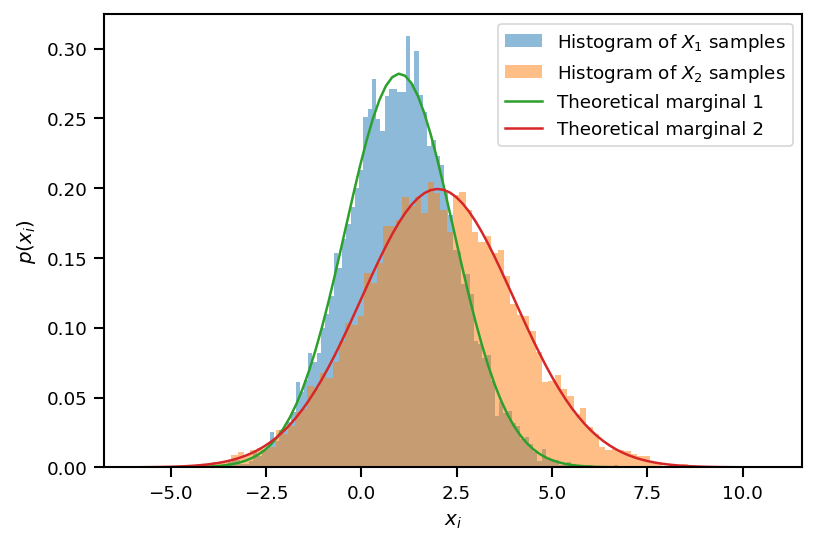

In [11]:
import scipy.stats as st
# The mean vector
mu = [1.0, 2.0]
# The covariance matrix
Sigma = np.array([[2.0, 0.9],
                   [0.9, 4.0]])
# The multivariate normal random vector
X = st.multivariate_normal(mean=mu, cov=Sigma)
# The number of samples to take for the histogram
num_samples = 10000
# The samples
x_samples = X.rvs(size=num_samples)
# Now, just take the X1 components of these samples:
x1_samples = x_samples[:, 0]
x2_samples = x_samples[:,1]
# And draw their histogram
fig, ax = plt.subplots(dpi=150)
ax.hist(x1_samples, density=True, bins=100, alpha=0.5, label='Histogram of $X_1$ samples')
# Compare to the theoretical marginal with mean:
ax.hist(x2_samples, density=True, bins=100, alpha=0.5, label='Histogram of $X_2$ samples')
mu1 = mu[0]
mu2 = mu[1]
# And variance:
Sigma11 = Sigma[0, 0]
Sigma22 =Sigma[1,1]
X1_theory = st.norm(loc=mu1, scale=np.sqrt(Sigma11))
X2_theory = st.norm(loc=mu2, scale=np.sqrt(Sigma22))
x1s = np.linspace(x2_samples.min(), x2_samples.max(), 100)
ax.plot(x1s, X1_theory.pdf(x1s), label='Theoretical marginal 1')
ax.plot(x1s, X2_theory.pdf(x1s), label='Theoretical marginal 2')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$p(x_i)$')
plt.legend(loc='best');

## Questions 

+ Expand the code so that you produce the figure that gives you the marginal of the $X_2$ component of $\mathbf{X}$.